In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mat=pd.read_csv("matches.csv")

In [3]:
dev=pd.read_csv("deliveries.csv")

In [4]:
mat.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
mat.shape

(1095, 20)

In [6]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [7]:
mat.describe()

,id,season,result_margin,target_runs,target_overs
count,1.095000e+03,1095.000000,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,2016.126027,17.259294,165.684066,19.759341
std,3.677402e+05,4.946940,21.787444,33.427048,1.581108
min,3.359820e+05,2008.000000,1.000000,43.000000,5.000000
25%,5.483315e+05,2012.000000,6.000000,146.000000,20.000000
50%,9.809610e+05,2016.000000,8.000000,166.000000,20.000000
75%,1.254062e+06,2021.000000,20.000000,187.000000,20.000000
max,1.426312e+06,2024.000000,146.000000,288.000000,20.000000


In [8]:
# city with most matches won
mat.groupby(["city"]).agg({"winner":["count"]}).max()


winner  count    173
dtype: int64

In [9]:
mat.groupby(["city"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)

,winner
,count
city,
Mumbai,173


In [10]:
# team that won most matches
mat["winner"].value_counts().head(1)

Mumbai Indians    144
Name: winner, dtype: int64

In [11]:
# player who won most of man of the match awards
mat["player_of_match"].value_counts().head(1)

AB de Villiers    25
Name: player_of_match, dtype: int64

In [12]:
# most frequent umpire 1
mat["umpire1"].value_counts().head(1)

AK Chaudhary    115
Name: umpire1, dtype: int64

In [13]:
# most frequent umpire 2

mat["umpire2"].value_counts().head(1)

S Ravi    83
Name: umpire2, dtype: int64

In [14]:
mat.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1095.0,904828.319635,367740.242299,335982.0,548331.5,980961.0,1254062.5,1426312.0
season,1095.0,2016.126027,4.946940,2008.0,2012.0,2016.0,2021.0,2024.0
result_margin,1076.0,17.259294,21.787444,1.0,6.0,8.0,20.0,146.0
target_runs,1092.0,165.684066,33.427048,43.0,146.0,166.0,187.0,288.0
target_overs,1092.0,19.759341,1.581108,5.0,20.0,20.0,20.0,20.0


In [15]:
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [16]:
dev.shape

(260920, 17)

In [17]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

<AxesSubplot:>

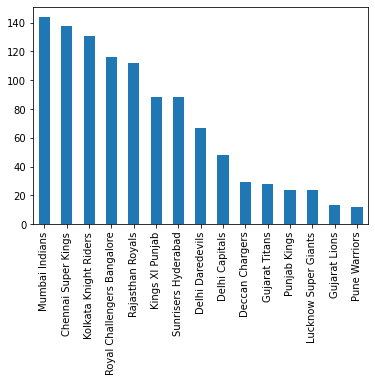

In [18]:
mat["winner"].value_counts().head(15).plot(kind="bar")

In [19]:
mat.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

<AxesSubplot:>

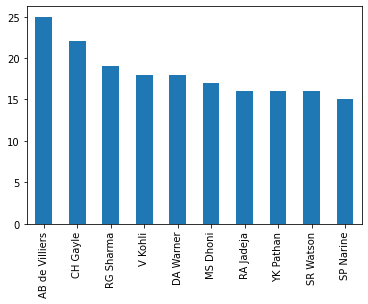

In [20]:
mat["player_of_match"].value_counts().head(10).plot(kind="bar")

<AxesSubplot:>

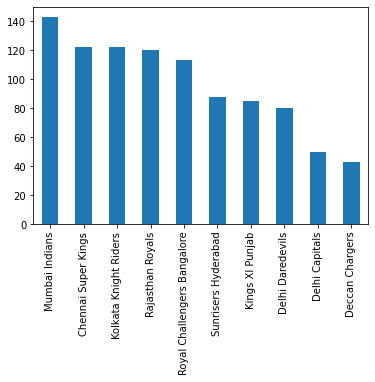

In [21]:
mat["toss_winner"].value_counts().head(10).plot(kind="bar")

In [22]:
mat.groupby(["toss_winner"]).agg({"winner":["count"]}).max()

winner  count    143
dtype: int64

In [23]:
mat.groupby(["toss_winner"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)

,winner
,count
toss_winner,
Mumbai Indians,143


In [24]:
mat=mat.rename(columns={"id":"match_id"})

In [25]:
mat

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,19-05-2024,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,21-05-2024,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,22-05-2024,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,24-05-2024,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [26]:
dev.head(250)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,335983,1,Chennai Super Kings,Kings XI Punjab,3,1,MEK Hussey,S Sreesanth,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN
246,335983,1,Chennai Super Kings,Kings XI Punjab,3,2,MEK Hussey,S Sreesanth,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN
247,335983,1,Chennai Super Kings,Kings XI Punjab,3,3,MEK Hussey,S Sreesanth,ML Hayden,1,0,1,NaN,0,NaN,NaN,NaN
248,335983,1,Chennai Super Kings,Kings XI Punjab,3,4,ML Hayden,S Sreesanth,MEK Hussey,1,0,1,NaN,0,NaN,NaN,NaN


In [27]:
df=pd.merge(mat,dev,on="match_id",how="left")

In [28]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [29]:
df.isnull().sum()

match_id                 0
season                   0
city                 12397
date                     0
match_type               0
player_of_match        490
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 490
result                   0
result_margin         4124
target_runs            309
target_overs           309
super_over               0
method              257274
umpire1                  0
umpire2                  0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [30]:
df.shape

(260920, 36)

In [31]:
df.dropna(how="all",axis=1).head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260920 entries, 0 to 260919
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   season            260920 non-null  int64  
 2   city              248523 non-null  object 
 3   date              260920 non-null  object 
 4   match_type        260920 non-null  object 
 5   player_of_match   260430 non-null  object 
 6   venue             260920 non-null  object 
 7   team1             260920 non-null  object 
 8   team2             260920 non-null  object 
 9   toss_winner       260920 non-null  object 
 10  toss_decision     260920 non-null  object 
 11  winner            260430 non-null  object 
 12  result            260920 non-null  object 
 13  result_margin     256796 non-null  float64
 14  target_runs       260611 non-null  float64
 15  target_overs      260611 non-null  float64
 16  super_over        26

In [33]:
mat.groupby(["season"]).agg({"match_id":"count"}).rename(columns={'match_id':'no. of matches'})

,no. of matches
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


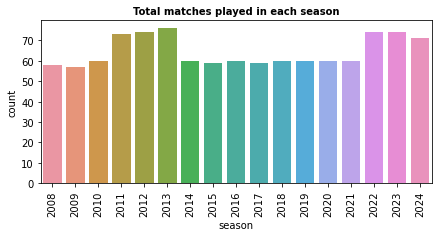

In [34]:
plt.subplots(figsize=(7, 3))
sns.countplot(x="season",data=mat)
plt.xticks(rotation=90)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")
plt.show()

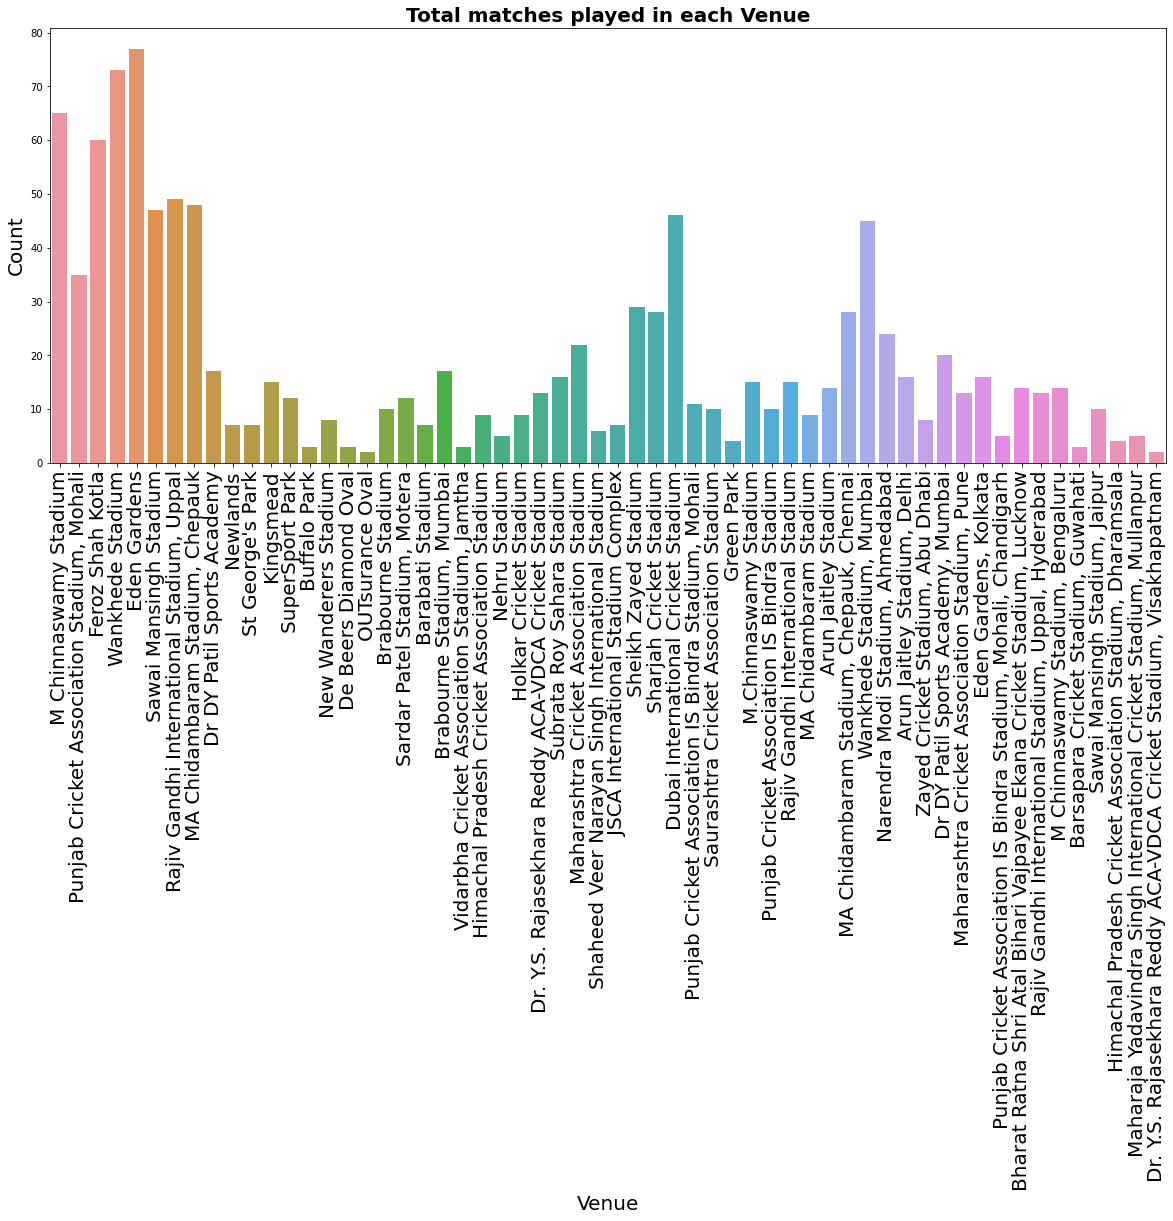

In [35]:
#Number of matches playes in each stadium
# mat.venue.value_counts().head(15).plot(kind="bar",figsize=(16,10))

plt.subplots(figsize=(20, 8))
sns.countplot(x="venue",data=mat)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Venue', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Total matches played in each Venue', fontsize = 20, fontweight = "bold")
plt.show()

In [36]:
def bat_first(x):
    if 'toss_winning_team'=='team1':
        if 'toss_decition'=='bat':
            return 'team1'
        else:
            return 'team2'
    elif 'toss_winning_team'=='team2':
        if 'toss_decition'=='bat':
            return 'team2'
        else:
            return 'team1'


In [37]:
dev.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [38]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [39]:
filter=["team1","toss_winner"]

In [40]:
tab=df[filter]
tab.groupby(["team1"]).agg("count")

,toss_winner
team1,
Chennai Super Kings,31138
Deccan Chargers,9448
Delhi Capitals,10082
Delhi Daredevils,19753
Gujarat Lions,3784
Gujarat Titans,4954
Kings XI Punjab,21848
Kochi Tuskers Kerala,1563
Kolkata Knight Riders,28560


In [41]:
mat.groupby(["team1"]).agg({"match_id":"count"})

,match_id
team1,
Chennai Super Kings,128
Deccan Chargers,39
Delhi Capitals,41
Delhi Daredevils,85
Gujarat Lions,16
Gujarat Titans,21
Kings XI Punjab,92
Kochi Tuskers Kerala,7
Kolkata Knight Riders,121


In [42]:
season=df.groupby(['season'])['total_runs'].sum()
season

season
2008    17937
2009    16353
2010    18883
2011    21154
2012    22453
2013    22602
2014    18931
2015    18353
2016    18862
2017    18786
2018    19901
2019    19434
2020    19416
2021    18637
2022    24395
2023    25688
2024    25971
Name: total_runs, dtype: int64

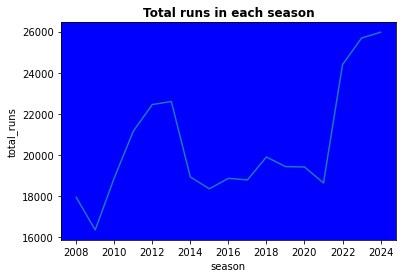

In [43]:

# season=df.groupby(['season'])['total_runs'].sum()
ax = plt.axes()
ax.set(facecolor = "blue")
sns.lineplot(data=season,palette="magma") 
plt.title('Total runs in each season',fontsize=12,fontweight="bold")
plt.show()

In [44]:
x=dev.groupby(['batting_team'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
y=x.reset_index(drop=True,inplace=True)
y
x

,batting_team,total_runs
0,Mumbai Indians,42176
1,Kolkata Knight Riders,39331
2,Chennai Super Kings,38629
3,Royal Challengers Bangalore,37692
4,Rajasthan Royals,34747
5,Kings XI Punjab,30064
6,Sunrisers Hyderabad,29071
7,Delhi Daredevils,24296
8,Delhi Capitals,14900
9,Deccan Chargers,11463


In [45]:
mat["toss_winner"].value_counts().head(10)

Mumbai Indians                 143
Chennai Super Kings            122
Kolkata Knight Riders          122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Name: toss_winner, dtype: int64

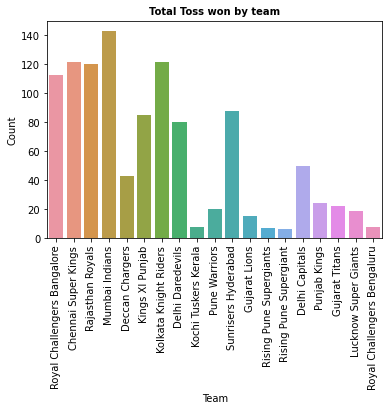

In [46]:
sns.countplot(x="toss_winner",data=mat)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Team', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total Toss won by team', fontsize = 10, fontweight = "bold")
plt.show()

In [47]:
k=mat.toss_decision[ mat.toss_winner==mat.winner]
k

1         bat
8       field
10      field
12      field
14        bat
        ...  
1072    field
1073      bat
1075    field
1078    field
1092    field
Name: toss_decision, Length: 554, dtype: object

<AxesSubplot:ylabel='toss_decision'>

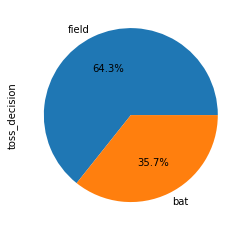

In [52]:
mat.toss_decision.value_counts().plot(kind="pie", autopct='%1.1f%%')

In [53]:
dev.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

<AxesSubplot:xlabel='batter'>

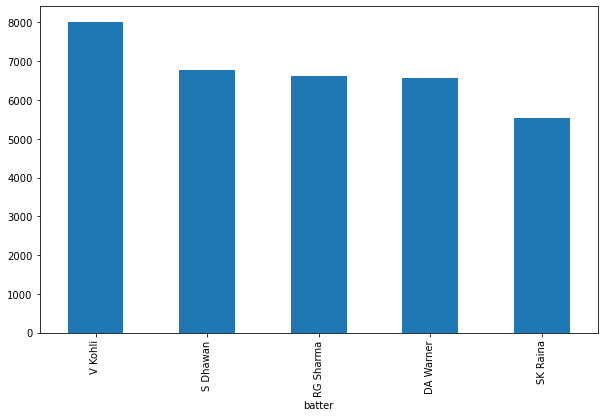

In [55]:
dev.groupby(["batter"])["batsman_runs"].sum().sort_values(ascending=False).head(5).plot(kind="bar",figsize=(10,6))

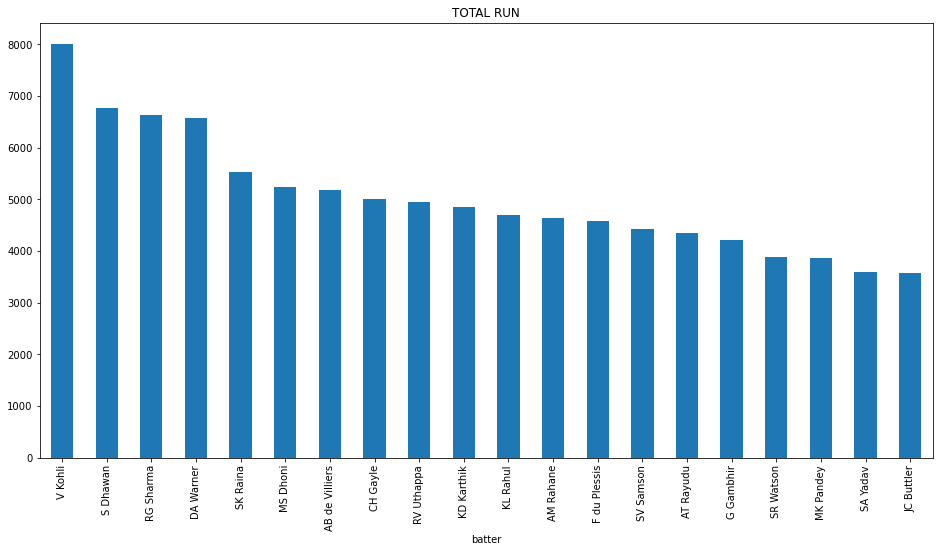

In [59]:
dev.groupby(["batter"])["batsman_runs"].sum().sort_values(ascending=False).head(20).plot(kind="bar",figsize=(16,8))
plt.title("TOTAL RUN")
plt.show()

In [60]:
strike_rate=dev.groupby(["batter"]).agg({"ball":"count","batsman_runs":"sum"}).sort_values(by="batsman_runs" ,ascending=False)

In [61]:
strike_rate["strike_rate"]=strike_rate.batsman_runs/strike_rate.ball*100

In [62]:
strike_rate.head(10)

,ball,batsman_runs,strike_rate
batter,,,
V Kohli,6236,8014,128.511867
S Dhawan,5483,6769,123.454313
RG Sharma,5183,6630,127.918194
DA Warner,4849,6567,135.429986
SK Raina,4177,5536,132.535312
MS Dhoni,3947,5243,132.835065
AB de Villiers,3487,5181,148.580442
CH Gayle,3516,4997,142.121729
RV Uthappa,3927,4954,126.152279


In [63]:
df.groupby(["batter","season"])["batsman_runs"].sum().sort_values(ascending=False).head(10)

batter         season
V Kohli        2016      973
Shubman Gill   2023      890
JC Buttler     2022      863
DA Warner      2016      848
V Kohli        2024      741
KS Williamson  2018      735
MEK Hussey     2013      733
CH Gayle       2012      733
F du Plessis   2023      730
CH Gayle       2013      720
Name: batsman_runs, dtype: int64

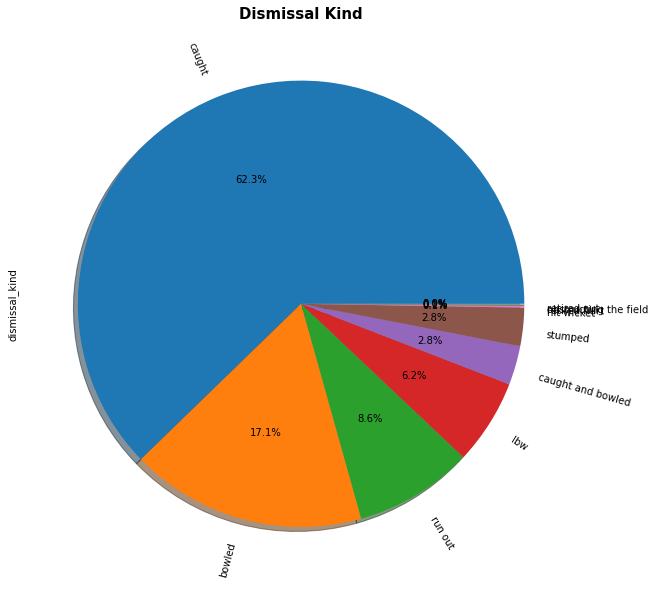

In [64]:
plt.subplots(figsize=(10, 18))
dev['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()

In [65]:
dev.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [66]:
dev.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [67]:
eco=dev.groupby("bowler").agg({"batsman_runs":"sum","ball":"count"}).sort_values(by="ball",ascending=False)


In [68]:
eco["economy"]=eco["batsman_runs"]/(eco["ball"]/6)

In [69]:
eco.head(10)

,batsman_runs,ball,economy
bowler,,,
R Ashwin,5178,4679,6.639880
SP Narine,4492,4146,6.500724
B Kumar,4744,4060,7.010837
PP Chawla,5027,3895,7.743774
RA Jadeja,4777,3895,7.358665
YS Chahal,4478,3628,7.405733
Harbhajan Singh,3928,3496,6.741419
A Mishra,4065,3444,7.081882
DJ Bravo,4178,3296,7.605583


In [70]:
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [71]:
df.groupby('bowler').agg({'total_runs':'sum','ball':'count','player_dismissed':'count'}).sort_values(by=['total_runs'],ascending=False).head(10)


,total_runs,ball,player_dismissed
bowler,,,
R Ashwin,5435,4679,198
PP Chawla,5179,3895,201
B Kumar,5051,4060,195
RA Jadeja,4917,3895,169
YS Chahal,4681,3628,213
SP Narine,4672,4146,200
UT Yadav,4442,3190,163
DJ Bravo,4436,3296,207
A Mishra,4193,3444,183
